# Regression methods in sklearn

In [1]:
# A few useful imports and settings for plotting.

import numpy as np
import pandas as pd
import mdp
import matplotlib
from matplotlib.pyplot import plot, scatter

%matplotlib inline

# Customize all matplotlib plots
font = {'size': 18}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

# Make notebook reproducible
np.random.seed(0)

In [2]:
# Create random data
x = np.random.rand(100) + 0.1
x.sort()
t = np.log(x) + np.random.randn(100) * 0.2

# sklearn needs 2D data
x.shape = (-1, 1)

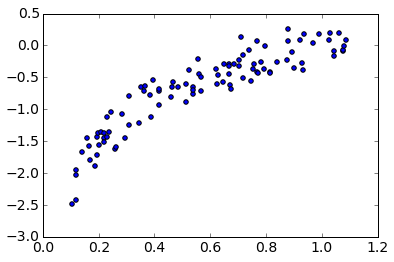

In [3]:
scatter(x, t)

## Vanilla linear regression

-1.80564771853


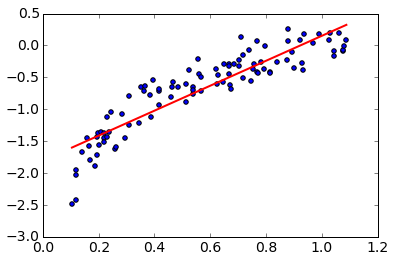

In [4]:
from sklearn import linear_model

linear_regr = linear_model.LinearRegression()
linear_regr.fit(x, t)

y = linear_regr.predict(x)
print linear_regr.intercept_
plot(x, y, 'r', lw=2)
scatter(x, t)

## Using non-linear basis functions

In [5]:
# Create RBF functions using mdp

M = 6
centers = np.linspace(0.0, 1.2, M)
centers.shape = (-1, 1)
sizes = np.ones(M) * 0.3
rbf = mdp.nodes.RBFExpansionNode(centers, sizes)

# Transform data
phi_x = rbf(x)

In [6]:
x.shape, phi_x.shape

((100, 1), (100, 6))

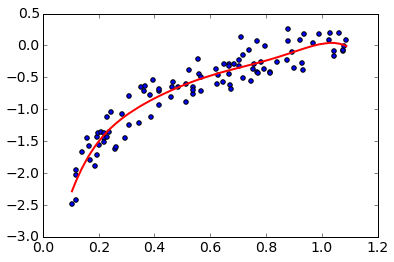

In [7]:
# Linear regression using the transformed data

linear_regr = linear_model.LinearRegression()
linear_regr.fit(phi_x, t)

y = linear_regr.predict(phi_x)
plot(x, y, 'r', lw=2)
scatter(x, t)

## Support Vector Regression

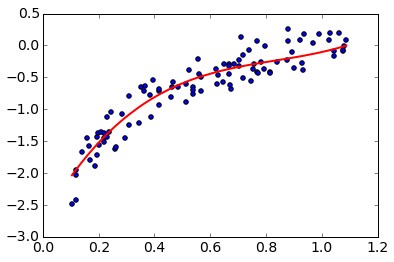

In [8]:
from sklearn import svm

regr = svm.SVR(kernel='poly', degree=3, C=100.0, epsilon=0.001, coef0=1.0)
regr.fit(x, t)

y = regr.predict(x)
plot(x, y, 'r', lw=2)
scatter(x, t)

## Decision trees

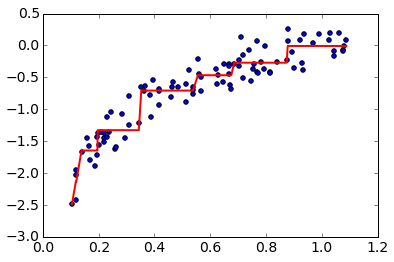

In [9]:
from sklearn import tree

regr = tree.DecisionTreeRegressor(max_depth=3)
regr.fit(x, t)

y = regr.predict(x)
plot(x, y, 'r', lw=2)
scatter(x, t)

## Regularization using Lasso

Coefficients [-0.         -0.         -3.34531036  0.          0.          0.        ]


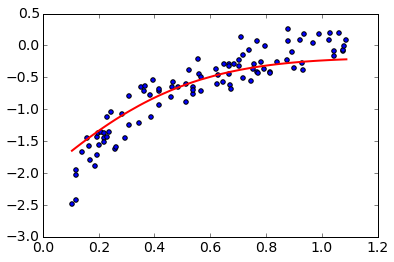

In [10]:
regr = linear_model.Lasso(alpha=0.02)
regr.fit(phi_x, t)

y = regr.predict(phi_x)
plot(x, y, 'r', lw=2)
scatter(x, t)

# Can be used for feature selection
print 'Coefficients', regr.coef_